<a href="https://colab.research.google.com/github/Wishmi-Sasika/MLOM-Labs/blob/main/Data_Preprocessing_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from  matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Importing dataset

In [8]:
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data/Cus Churn.csv")
df.sample (5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
603,2001-MCUUW,Male,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,No
1861,7054-LGEQW,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes
6405,5298-GSTLM,Female,1,No,No,60,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),101.40,6176.6,No
1280,2388-LAESQ,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.85,8317.95,No
2851,1897-OKVMW,Female,0,Yes,Yes,64,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.60,5817.45,No


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Removing customer ID column

In [10]:
df.drop ('customerID', axis = 'columns', inplace = True)

In [11]:
df.sample (5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
130,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.95,1215.65,No
1329,Female,0,Yes,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.40,1496.45,No
2814,Female,0,Yes,Yes,62,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),48.70,3008.55,No
6454,Female,0,No,No,41,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),81.30,3190.65,No


In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Removing the rows containing null values in TotalCharges column

In [13]:
# Monthly charges -> float
# Total charges -> string
# Need to convert it into a number

In [14]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [16]:
df [pd.to_numeric (df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
df [pd.to_numeric (df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [18]:
df.shape

(7043, 20)

In [19]:
df.iloc [488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [20]:
df.iloc [488]['TotalCharges']

' '

In [21]:
df1 = df [df.TotalCharges != ' ']
df1.shape

(7032, 20)

# Converting object into float

In [22]:
df1.TotalCharges = pd.to_numeric (df1.TotalCharges)

<ipython-input-22-417fd03c9c95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric (df1.TotalCharges)


In [23]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Visualization

In [24]:
df1 [df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [25]:
tenure_churn_no = df1 [df1.Churn == 'No'].tenure
tenure_churn_yes = df1 [df1.Churn == 'Yes'].tenure

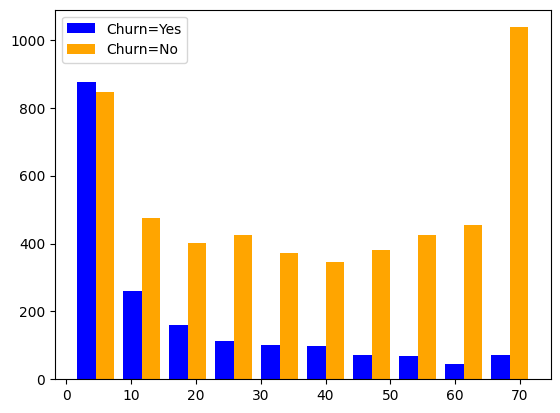

In [26]:
plt.hist ([tenure_churn_yes, tenure_churn_no], color = ['blue', 'orange'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()

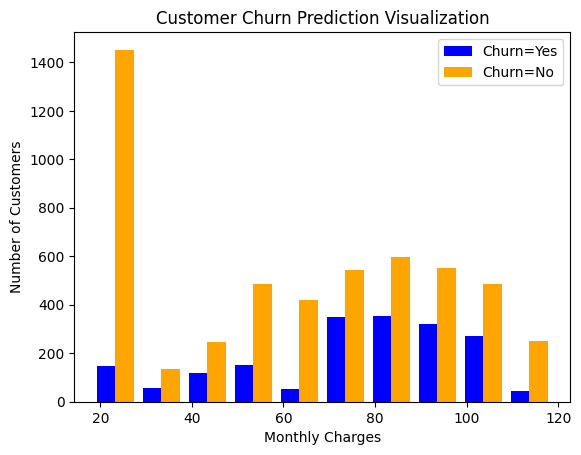

In [27]:
mc_churn_no = df1 [df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1 [df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel ('Monthly Charges')
plt.ylabel ('Number of Customers')
plt.title ('Customer Churn Prediction Visualization')

plt.hist ([mc_churn_yes, mc_churn_no], color = ['blue', 'orange'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()

# Getting unique values from each column

In [28]:
for column in df1:
    print (column)
    print (df1 [column].unique())
    print()

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges


In [29]:
def print_unique_col_values (df):
    for column in df:
        if df[column].dtypes == 'object':
            print (column)
            print (df1[column].unique())
            print ()

In [30]:
print_unique_col_values (df1)

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



# Replacing several types of No in a single column with single No

In [31]:
df1.replace ('No internet service', 'No', inplace = True)
df1.replace ('No phone service', 'No', inplace = True)

<ipython-input-31-bfaf7a0f3927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace ('No internet service', 'No', inplace = True)
<ipython-input-31-bfaf7a0f3927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace ('No phone service', 'No', inplace = True)


In [32]:
print_unique_col_values (df1)

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes']

OnlineBackup
['Yes' 'No']

DeviceProtection
['No' 'Yes']

TechSupport
['No' 'Yes']

StreamingTV
['No' 'Yes']

StreamingMovies
['No' 'Yes']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



# Encoding (Converting categorical columns into numerical)

In [33]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [34]:
for col in yes_no_columns:
    df1[col].replace ({'Yes': 1, 'No': 0}, inplace = True)

<ipython-input-34-f1dcb4be60c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace ({'Yes': 1, 'No': 0}, inplace = True)


In [35]:
for column in df1:
    print (column)
    print (df1 [column].unique())
    print()

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
[1 0]

Dependents
[0 1]

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService
[0 1]

MultipleLines
[0 1]

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
[0 1]

OnlineBackup
[1 0]

DeviceProtection
[0 1]

TechSupport
[0 1]

StreamingTV
[0 1]

StreamingMovies
[0 1]

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
[1 0]

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Churn
[0 1]



In [36]:
df1['gender'].replace ({'Female': 1, 'Male': 0}, inplace = True)
df1['gender'].unique()

<ipython-input-36-2238716d2cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace ({'Female': 1, 'Male': 0}, inplace = True)


array([1, 0])

# One hot encoding

In [37]:
df2 = pd.get_dummies (data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
168,0,1,1,0,58,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
4495,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5048,1,1,1,0,54,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2115,1,0,0,0,71,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Scaling

To bring the values to 0-1 range.

In [40]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform (df2[cols_to_scale])

In [42]:
df2.sample (4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6321,1,0,1,0,0.408451,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5643,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1299,1,0,1,0,0.140845,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4266,0,0,0,0,0.859155,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0


# Data distribution

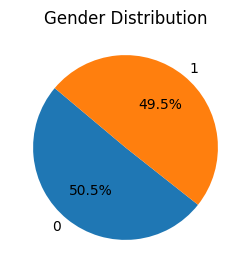

In [43]:
gender_counts = df2['gender'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

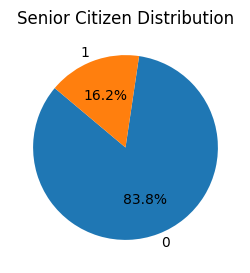

In [44]:
Senior_citizen_counts = df2['SeniorCitizen'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(Senior_citizen_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Senior Citizen Distribution')
plt.show()

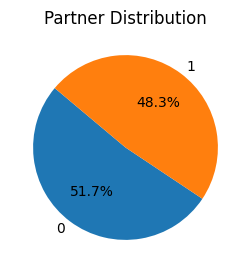

In [45]:
partner_counts = df2['Partner'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Partner Distribution')
plt.show()

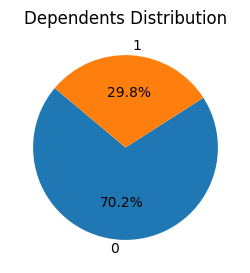

In [46]:
dependents_counts = df2['Dependents'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dependents Distribution')
plt.show()

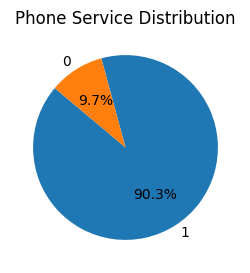

In [47]:
ps_counts = df2['PhoneService'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(ps_counts, labels=ps_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phone Service Distribution')
plt.show()

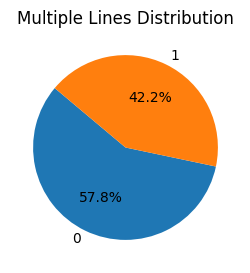

In [48]:
ml_counts = df2['MultipleLines'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(ml_counts, labels=ml_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Multiple Lines Distribution')
plt.show()

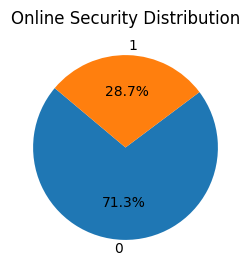

In [49]:
os_counts = df2['OnlineSecurity'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Online Security Distribution')
plt.show()

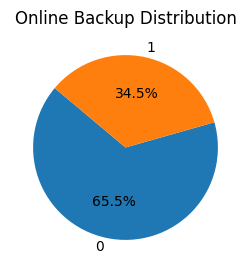

In [50]:
ob_counts = df2['OnlineBackup'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(ob_counts, labels=ob_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Online Backup Distribution')
plt.show()

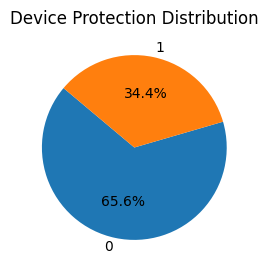

In [51]:
dp_counts = df2['DeviceProtection'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(dp_counts, labels=dp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Device Protection Distribution')
plt.show()

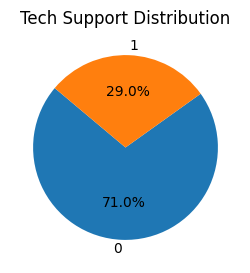

In [52]:
ts_counts = df2['TechSupport'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(ts_counts, labels=ts_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tech Support Distribution')
plt.show()

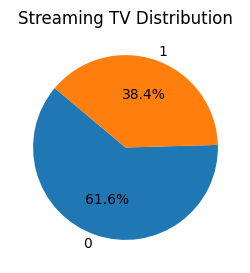

In [53]:
st_counts = df2['StreamingTV'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(st_counts, labels=st_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Streaming TV Distribution')
plt.show()

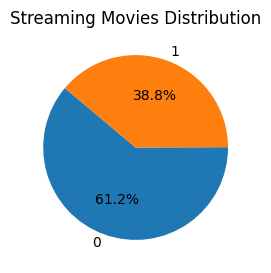

In [54]:
sm_counts = df2['StreamingMovies'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(sm_counts, labels=sm_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Streaming Movies Distribution')
plt.show()

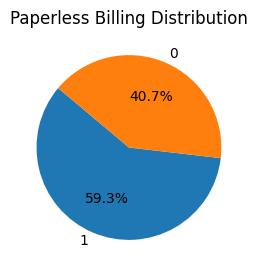

In [55]:
plb_counts = df2['PaperlessBilling'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(plb_counts, labels=plb_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Paperless Billing Distribution')
plt.show()

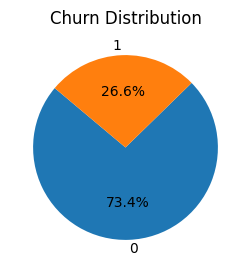

In [56]:
churn_counts = df2['Churn'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

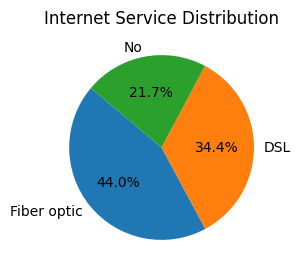

In [57]:
is_counts = df['InternetService'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(is_counts, labels=is_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Internet Service Distribution')
plt.show()

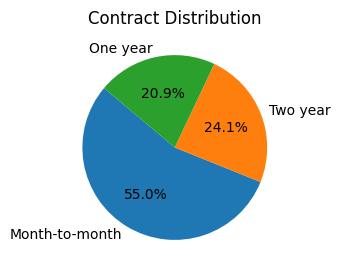

In [58]:
contract_counts = df['Contract'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Contract Distribution')
plt.show()

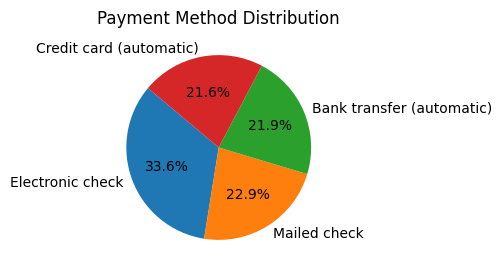

In [59]:
pm_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(pm_counts, labels=pm_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.show()

# Train test split

In [60]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [61]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [62]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [63]:
5163/1869

2.7624398073836276

In [64]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [65]:
X_train.shape

(5625, 26)

In [66]:
X_test.shape

(1407, 26)

In [67]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [68]:
len(X_train.columns)

26

# Building the model (ANN) in tensorflow / keras

In [71]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [72]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [73]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4930 - accuracy: 0.7588
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7954
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8014
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8055
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4123 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4085 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4019 - accura

# SMOTE (Synthetic Minority Over-sampling Technique)

In [74]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [75]:
from imblearn.over_sampling import SMOTE

# Oversampling the minority class to match the majority class.
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Now, you can check the class distribution
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [77]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [78]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7225
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7778
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7824
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7895
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7938
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7965
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7993
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8025
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8057
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4227 - accura

In [79]:
len(y_preds)

2066